In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data_raw = pd.read_excel('data_source.xlsx', index_col=0)
data_raw

,"Абонентская плата за доступ к сети Интернет, месяц","Абонентская плата за мобильный Интернет, месяц",Курс доллара к рублю,Фьючерс на нефть Brent,"Валовой внутренний продукт, по паритету покупательной способности",Среднемесячная номинальная начисленная заработная плата работающих в экономике в ХМАО,численность населения рф,численность населения ХМАО,"Инвестиции из-за рубежа в отрасль ""Связь"" (данные Росстата России) - всего, млн. $","Капитальные вложения - всего, млн.руб.","Услуги доступа к информации с использованием инфокоммуникационных технологий(Интернет) - всего, Тбайт"
Месяц,,,,,,,,,,,
2008-01-01,NaN,NaN,24.4796,92.21,NaN,37412.00,142008838.0,1505248.0,1320.0,234157.2,NaN
2008-02-01,NaN,NaN,24.5392,100.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,NaN,NaN,23.7773,100.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01,NaN,NaN,23.5083,111.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-01,NaN,NaN,23.7384,127.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-01,NaN,NaN,23.6345,139.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-01,NaN,NaN,23.3727,123.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,24.3218,114.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,25.2690,98.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2008-01-01 to 2018-04-01
Data columns (total 11 columns):
Абонентская плата за доступ к сети Интернет, месяц                                                       111 non-null float64
Абонентская плата за мобильный Интернет, месяц                                                           51 non-null float64
Курс доллара к рублю                                                                                     124 non-null float64
Фьючерс на нефть Brent                                                                                   124 non-null float64
Валовой внутренний продукт, по паритету покупательной способности                                        10 non-null float64
Среднемесячная номинальная начисленная заработная плата работающих в экономике в ХМАО                    24 non-null float64
численность населения рф                                                                                 11 non-null float6

# Интерполяция

## Графики без интерполяции

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B27A3BF9B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001B27A957588>], dtype=object)

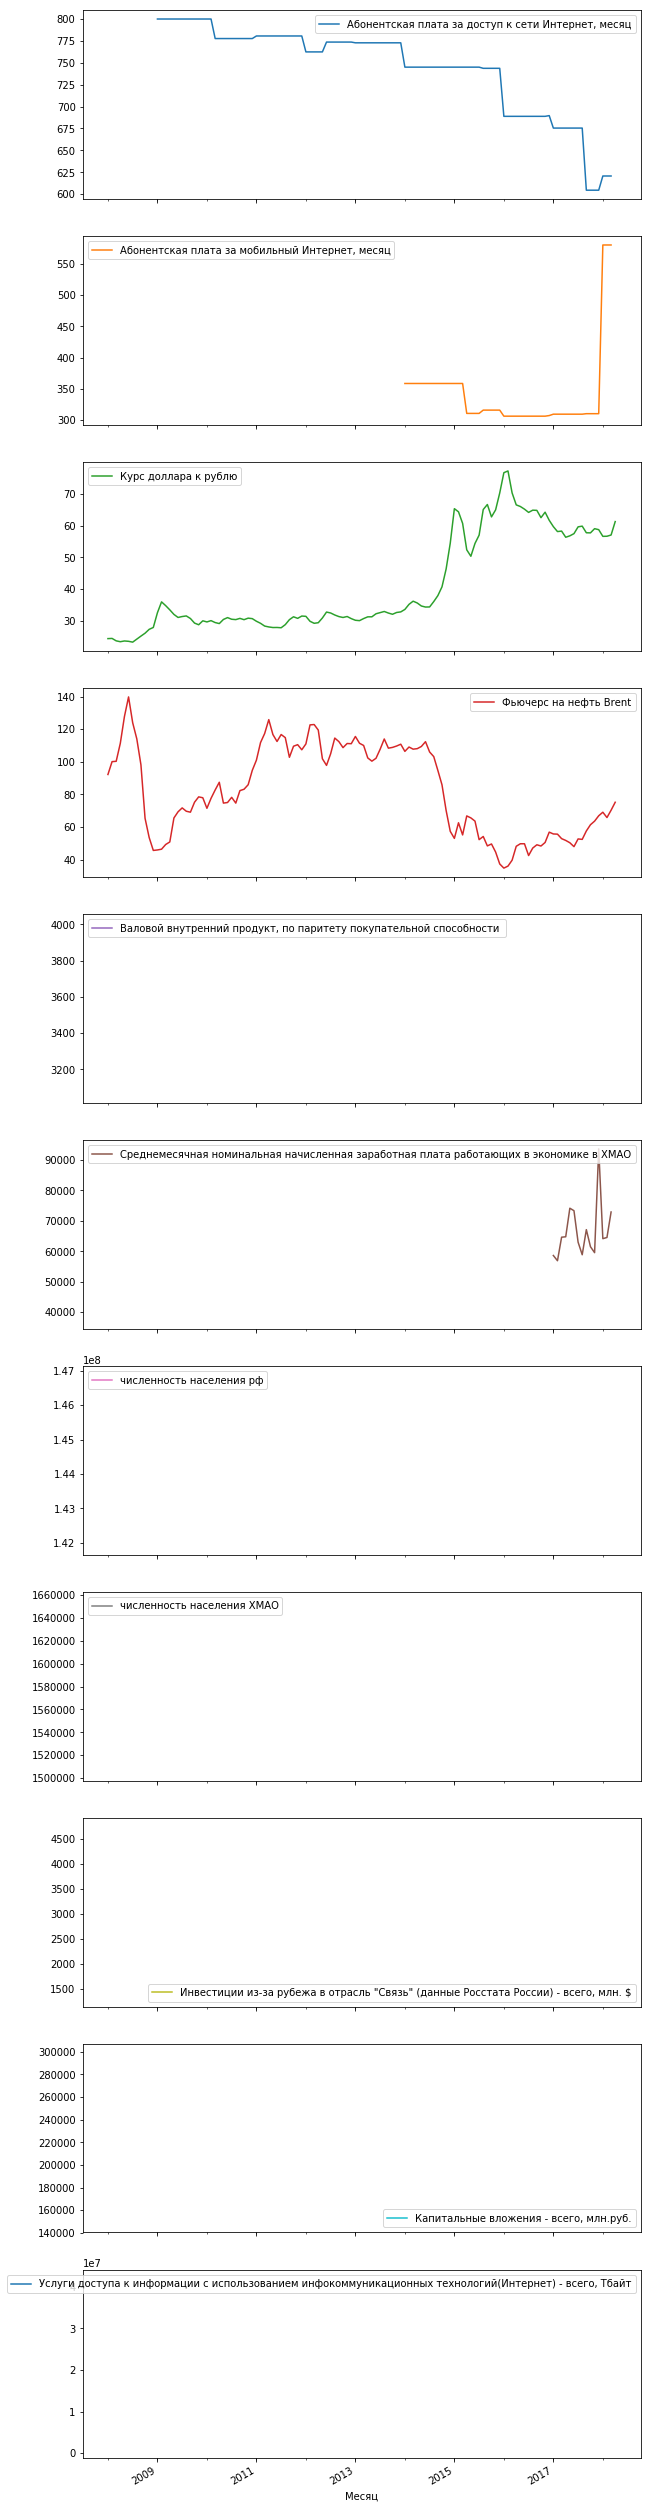

In [4]:
data_raw.plot(subplots=True, figsize=(10,50))

## Графики с интерполяцией
*С применением экстраполяции*

In [5]:
import numpy as np
import scipy as sp
import scipy.interpolate

In [6]:
xnew = [t.timestamp() for t in data_raw.index]
data_inter_matrix = np.zeros(data_raw.shape)
for index, col in enumerate(data_raw.columns):
    data_exist = data_raw[col]
    data_exist = data_exist[data_exist.isnull() == False]
    y = data_exist.as_matrix()
    x = [t.timestamp() for t in data_exist.index]
    f = sp.interpolate.interp1d(x, y, bounds_error=False, kind='cubic', fill_value='extrapolate')
    data_inter_matrix[:, index] = f(xnew)
    

In [7]:
data_inter = pd.DataFrame(data_inter_matrix, columns=data_raw.columns, index=data_raw.index)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B27B691780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001B27AE00BA8>], dtype=object)

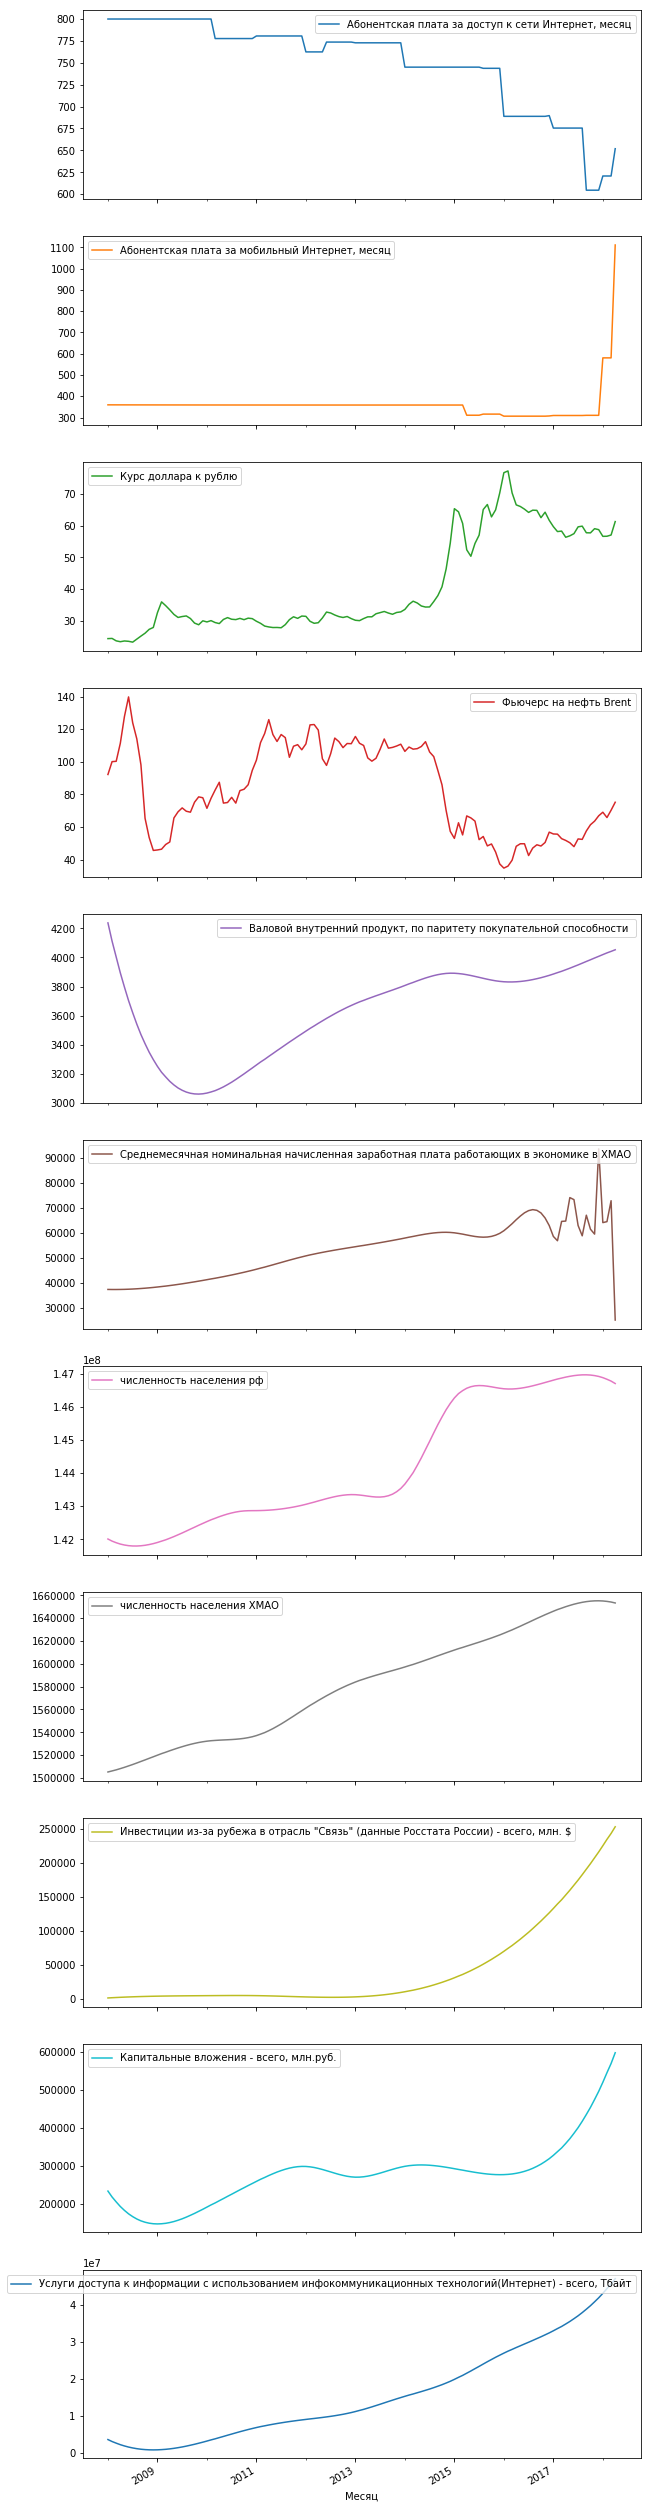

In [8]:
data_inter.plot(subplots=True, figsize=(10,50))

In [9]:
data_inter

,"Абонентская плата за доступ к сети Интернет, месяц","Абонентская плата за мобильный Интернет, месяц",Курс доллара к рублю,Фьючерс на нефть Brent,"Валовой внутренний продукт, по паритету покупательной способности",Среднемесячная номинальная начисленная заработная плата работающих в экономике в ХМАО,численность населения рф,численность населения ХМАО,"Инвестиции из-за рубежа в отрасль ""Связь"" (данные Росстата России) - всего, млн. $","Капитальные вложения - всего, млн.руб.","Услуги доступа к информации с использованием инфокоммуникационных технологий(Интернет) - всего, Тбайт"
Месяц,,,,,,,,,,,
2008-01-01,799.989704,359.587007,24.4796,92.21,4237.450283,37412.000000,1.420088e+08,1.505248e+06,1320.000000,234157.200000,3.588041e+06
2008-02-01,799.991946,359.549155,24.5392,100.10,4112.416677,37390.068632,1.419451e+08,1.506165e+06,1669.203098,218676.189562,3.056616e+06
2008-03-01,799.993725,359.514702,23.7773,100.30,4003.187021,37389.133757,1.418966e+08,1.507109e+06,1970.774995,205791.138172,2.616116e+06
2008-04-01,799.995314,359.478880,23.5083,111.36,3894.450789,37408.406444,1.418560e+08,1.508200e+06,2267.556829,193652.459999,2.203550e+06
2008-05-01,799.996573,359.445193,23.7384,127.78,3796.881441,37446.360298,1.418272e+08,1.509328e+06,2530.801118,183443.590076,1.859492e+06
2008-06-01,799.997614,359.411378,23.6345,139.83,3703.723185,37504.847221,1.418077e+08,1.510556e+06,2779.337155,174409.585924,1.558710e+06
2008-07-01,799.998397,359.379605,23.3727,123.98,3620.745806,37579.444525,1.417981e+08,1.511797e+06,2998.355293,167062.115888,1.318413e+06
2008-08-01,799.999005,359.347740,24.3218,114.05,3542.166313,37674.447010,1.417971e+08,1.513123e+06,3203.736416,160836.997481,1.120285e+06
2008-09-01,799.999437,359.316844,25.2690,98.17,3470.612770,37786.972370,1.418046e+08,1.514482e+06,3389.137334,155925.990566,9.708260e+05


# Корреляция с окном
*Сдвиг происходит на 12 месяцев назад и вперед для всех комбинаций данных*

In [10]:
import scipy.signal

In [11]:
data_matrix = data_inter.as_matrix()

In [12]:
y1 = data_matrix[:, 0]
y2 = data_matrix[:, 1]

In [13]:
def corr(d1, d2, n):
    y1 = d1
    y2 = d2
    N = np.arange(-n, n + 1, 1)
    cor = np.zeros(N.shape)
    correlate = sp.stats.pearsonr
    for index, shift in enumerate(N):
        if shift < 0:
            cor[index] = correlate(y1[abs(shift):], y2[:shift])[0]
        elif shift > 0:
            cor[index] = correlate(y1[:-shift], y2[shift:])[0]
        else:
            cor[index] = correlate(y1, y2)[0]
    return cor

n = 12
corr(y1, y2, n)

array([ 0.87316574,  0.88096625,  0.88920818,  0.89778941,  0.88669144,
        0.87765337,  0.86925407,  0.86162259,  0.85681868,  0.48189847,
        0.25072523,  0.09166929, -0.11957259, -0.1888005 , -0.2153373 ,
       -0.24367748, -0.29281089, -0.27787141, -0.26234586, -0.24609048,
       -0.1282403 , -0.14032959, -0.15303491, -0.16643754, -0.18048025])

In [14]:
n = 12
window_size = 2 * n + 1
data_cor_window_array = pd.DataFrame()
for index1, name1 in enumerate(data_inter.columns):
    for index2, name2 in enumerate(data_inter.columns):
        data_cor_window_array = data_cor_window_array.append(pd.DataFrame({
            'index1': [name1] * window_size,
            'index2': [name2] * window_size,
            'shift': np.arange(-n, n + 1, 1),
            'data': corr(data_inter_matrix[:, index1], data_inter_matrix[:, index2], n)
        }))

In [15]:
data_cor_window = data_cor_window_array
data_cor_window

,data,index1,index2,shift
0,0.917442,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-12
1,0.919317,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-11
2,0.922426,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-10
3,0.926706,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-9
4,0.931998,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-8
5,0.920809,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-7
6,0.923343,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-6
7,0.928866,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-5
8,0.937041,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-4
9,0.952974,"Абонентская плата за доступ к сети Интернет, м...","Абонентская плата за доступ к сети Интернет, м...",-3


In [18]:
fg = sb.FacetGrid(data_cor_window, col='index1', row='index2', xlim=(-n, n))
fg.fig.set_size_inches(100, 100)
fg.map(plt.bar, 'shift', 'data')
fg.savefig('img.png')